In [4]:

%matplotlib inline
import pandas as pd
import numpy as np
import math
import nsfg
import first
import pandas as pd
import thinkstats2
import thinkplot

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [5]:
resp = nsfg.ReadFemResp()

In [43]:
# Solution goes here
kidshist = thinkstats2.Hist(resp['numkdhh'])
kidshist.Total()

7643

PMF Original: Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318})
Mean/Std Dev Kids-Actual: 1.024205155043831 1.1886396957670224


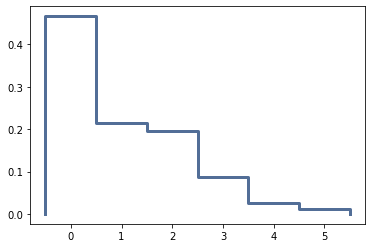

In [35]:
# Solution goes here
#This line shows the original pmf distribution
pmf_stand = thinkstats2.Pmf(kidshist)
print('PMF Original:', pmf_stand)
thinkplot.Pmf(pmf_stand)
print('Mean/Std Dev Kids-Actual:', pmf_stand.Mean(), pmf_stand.Std())

Mean/Std Dev Kids-Biased: 2.403679100664282 1.083176857907326


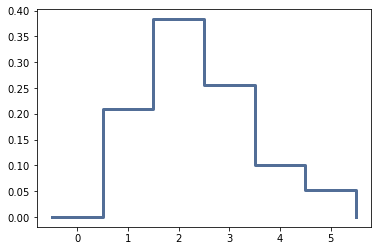

In [41]:
# Solution goes here
#This line will show the Biased PMF of mean kids
def biasPMF(pmf):
    bias_pmf = pmf.Copy()
    for i, v in pmf.Items():
        bias_pmf.Mult(i, i)
    bias_pmf.Normalize()
    return bias_pmf
        
bias_pmf = biasPMF(pmf_stand)
thinkplot.Pmf(bias_pmf)
print('Mean/Std Dev Kids-Biased:', bias_pmf.Mean(), bias_pmf.Std())

In [45]:
# Solution goes here
def CohenE(m1, v1, m2, v2, n1, n2):
    pooled_var = (n1*v1+n2*v2)/(n1+n2)
    d = (m1-m2)/math.sqrt(pooled_var)
    return d

In [48]:
CohenE(pmf_stand.Mean(), pmf_stand.Var(), bias_pmf.Mean(), bias_pmf.Var(), kidshist.Total(), kidshist.Total())

-1.2131172658578584

In [42]:
# Solution goes here

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [43]:
live, firsts, others = first.MakeFrames()

In [44]:
preg_map = nsfg.MakePregMap(live)

In [45]:
# Solution goes here

In [46]:
# Solution goes here

In [47]:
# Solution goes here

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [49]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

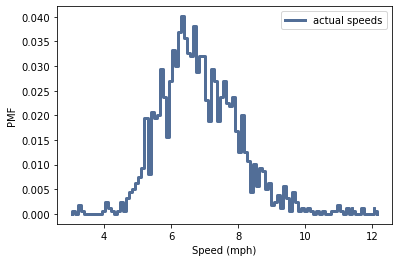

In [50]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [55]:
# Solution goes here
pmf

Pmf({12.09: 0.0006265664160401002, 11.73: 0.0012531328320802004, 11.46: 0.0006265664160401002, 11.28: 0.0012531328320802004, 11.1: 0.0006265664160401002, 11.01: 0.0018796992481203006, 10.92: 0.0006265664160401002, 10.83: 0.0006265664160401002, 10.559999999999999: 0.0006265664160401002, 10.379999999999999: 0.0006265664160401002, 10.2: 0.0006265664160401002, 10.11: 0.0012531328320802004, 10.02: 0.0006265664160401002, 9.93: 0.0012531328320802004, 9.84: 0.0006265664160401002, 9.75: 0.002506265664160401, 9.66: 0.0043859649122807015, 9.57: 0.0006265664160401002, 9.48: 0.003132832080200501, 9.39: 0.005639097744360902, 9.3: 0.0012531328320802004, 9.21: 0.0037593984962406013, 9.120000000000001: 0.002506265664160401, 9.030000000000001: 0.0018796992481203006, 8.940000000000001: 0.006265664160401002, 8.85: 0.005012531328320802, 8.76: 0.008771929824561403, 8.67: 0.009398496240601503, 8.58: 0.005639097744360902, 8.49: 0.010025062656641603, 8.4: 0.0043859649122807015, 8.309999999999999: 0.01065162907

In [86]:
# Solution goes here
def biasSpeed(PMF, speed=7):
    speedbias = pmf.Copy()
    for v in pmf.Values():
        #print(i,v)
        speedbias[v] *= abs(v-speed)
        speedbias.Normalize()
    return speedbias

In [87]:
output = biasSpeed(pmf)

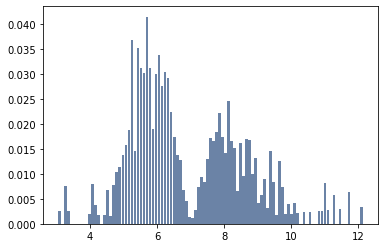

In [88]:
thinkplot.Hist(output)